In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [2]:
ad = sc.read_h5ad('../../data/talbot_xenium.h5ad')
ad = ad[ad.obs.tissue == 'tumor']
ad

View of AnnData object with n_obs × n_vars = 279424 × 5006
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'run', 'sample_folder', 'sample___', 'condition', 'tissue', 'genotype', 'timepoint', 'seg_method_short', 'n_genes_by_counts', 'sample_id'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'spatial'

In [3]:
sc.pp.calculate_qc_metrics(ad, percent_top=None, log1p=False, inplace=True)
sc.pp.filter_cells(ad,min_counts=30)
sc.pp.filter_cells(ad,min_genes=10)

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


In [4]:
sc.pp.normalize_total(ad, inplace=True,target_sum=100)
sc.pp.log1p(ad)

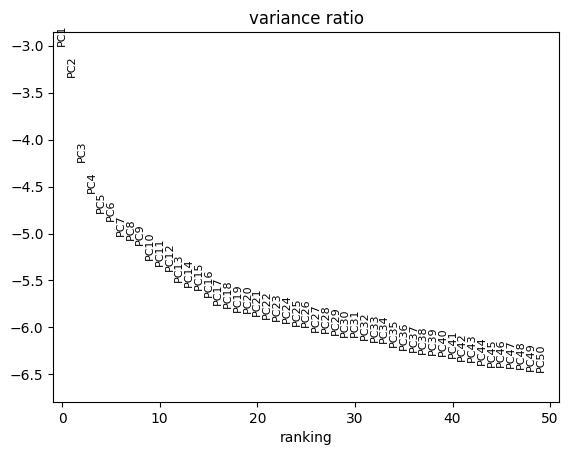

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
plt.rcdefaults()
sc.tl.pca(ad)
sc.pl.pca_variance_ratio(ad, n_pcs=50, log=True)
sc.pp.neighbors(ad, n_neighbors=15, n_pcs=30)

In [6]:
resolutions = [0.5, 1]
for resolution in resolutions: 
    print('clustering at resolution '+str(resolution))
    sc.tl.leiden(ad, resolution = resolution, key_added = 'leiden_'+str(resolution))
    print("done")

clustering at resolution 0.5
done
clustering at resolution 1
done


In [10]:
sc.tl.umap(ad, min_dist=0.1)

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


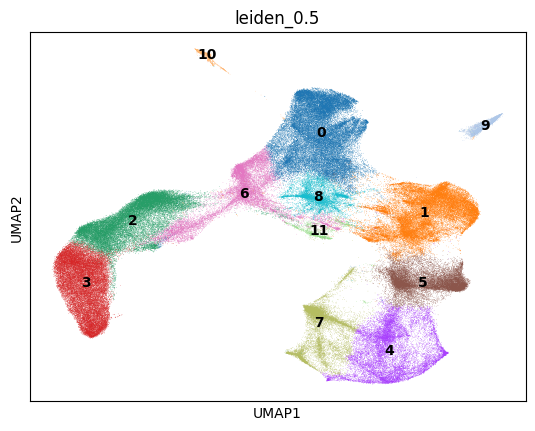

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


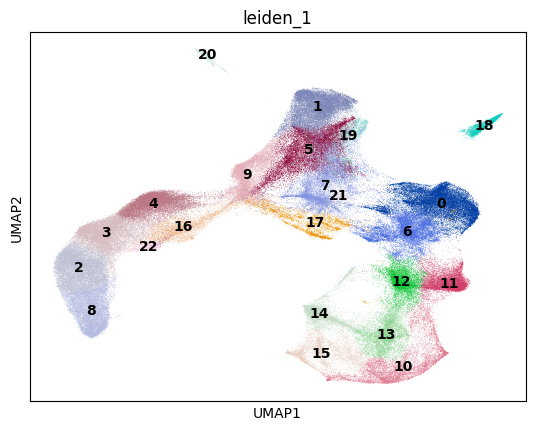

In [11]:
sc.pl.umap(ad, color = 'leiden_0.5', legend_loc = 'on data')
sc.pl.umap(ad, color = 'leiden_1', legend_loc = 'on data')

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


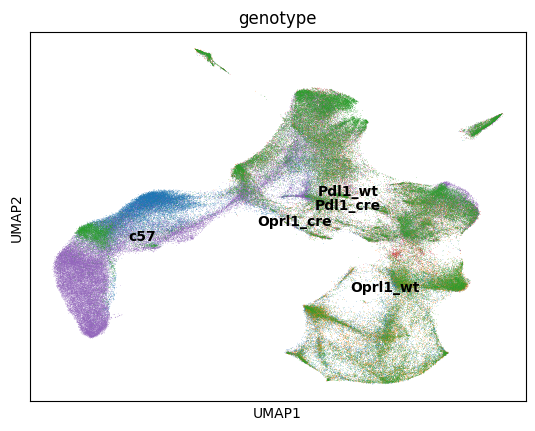

In [12]:
sc.pl.umap(ad, color = 'genotype', legend_loc = 'on data')

Pdl1_wt


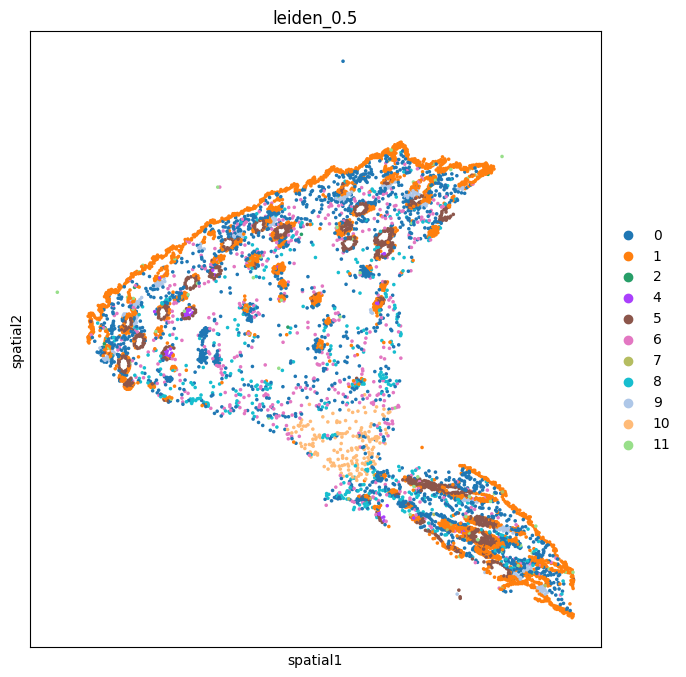

Pdl1_wt


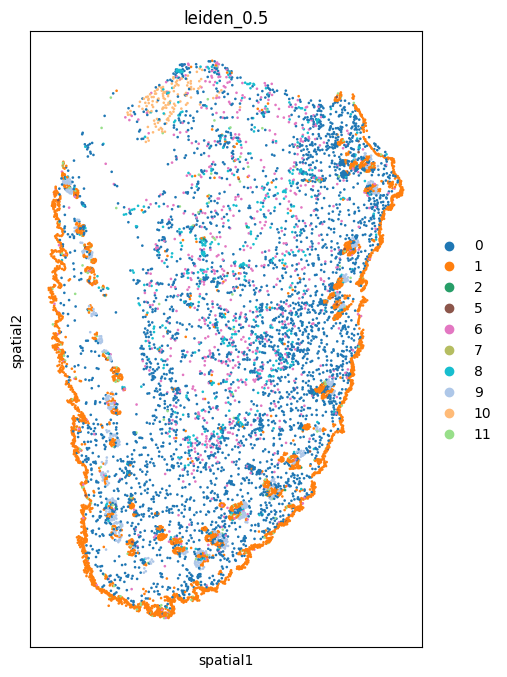

Oprl1_cre


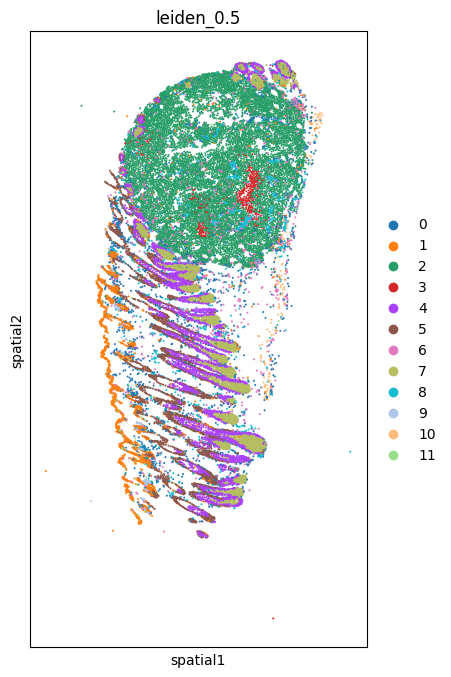

Oprl1_cre


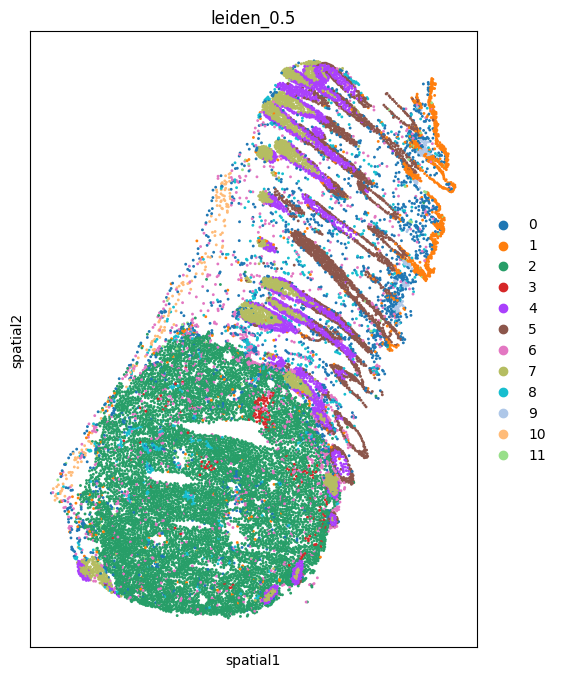

c57


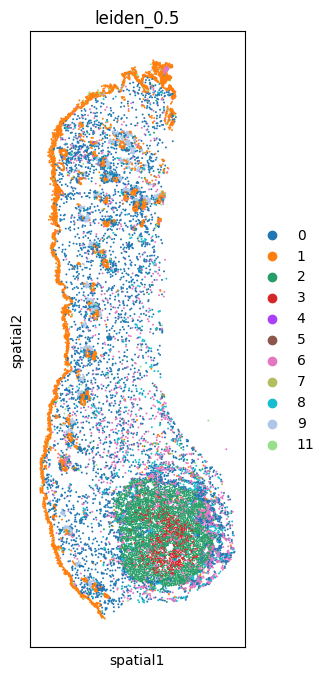

c57


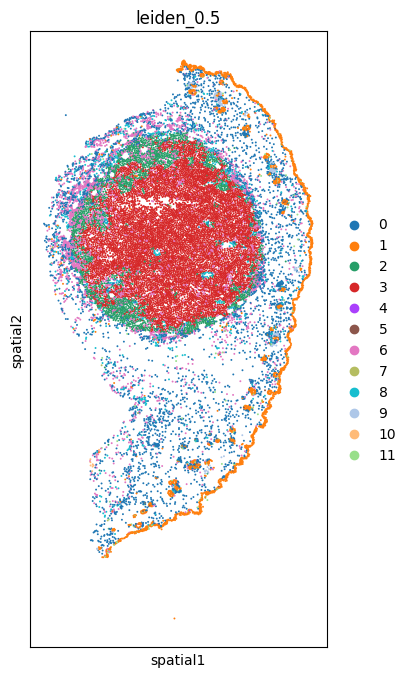

c57


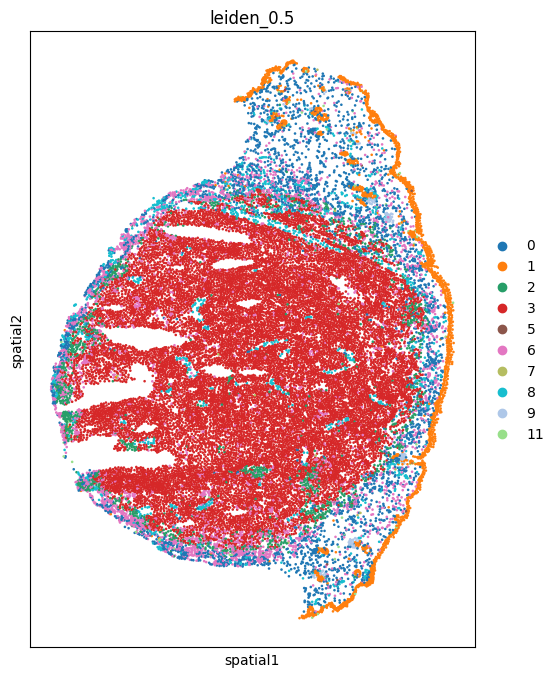

Oprl1_wt


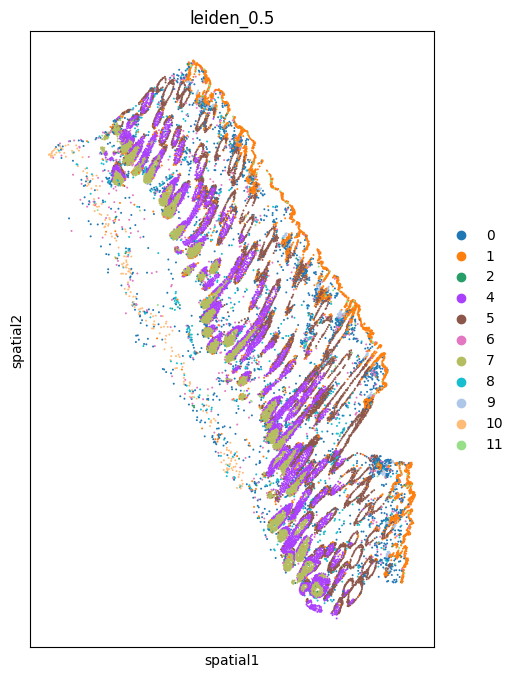

Pdl1_cre


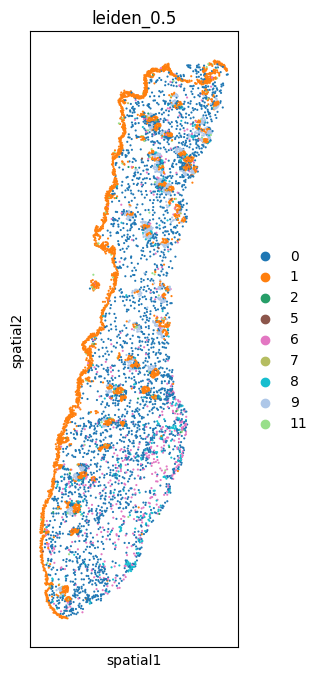

Pdl1_cre


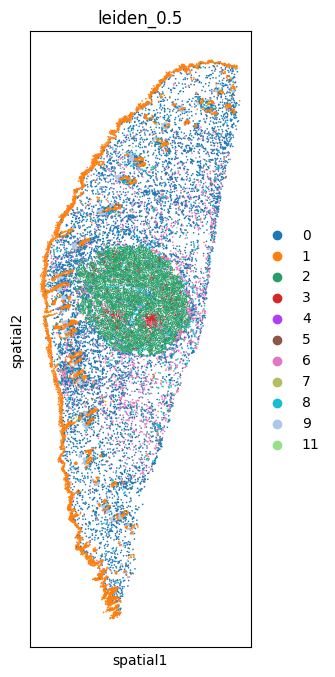

Pdl1_cre


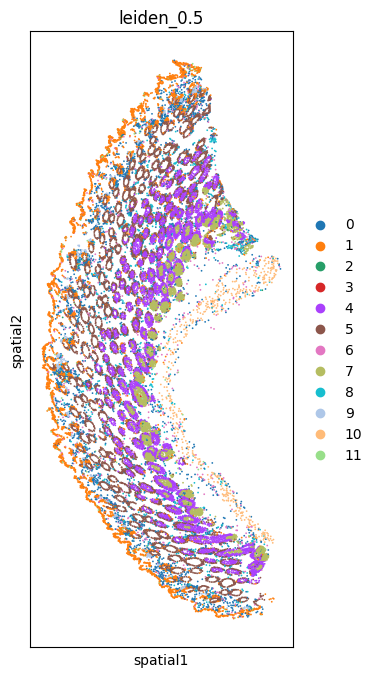

Pdl1_cre


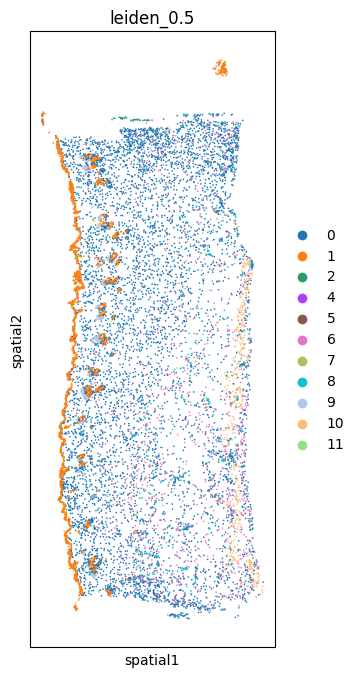

In [19]:
sample_id = []
for grid in ad.obs['sample_id'].unique():    
    ad_int = ad[ad.obs['sample_id'] == grid]
    print(ad_int.obs.condition.unique()[0])
    with plt.rc_context({'figure.figsize': (10, 8)}):
        sc.pl.spatial(ad_int, spot_size=15, color = 'leiden_0.5')
    plt.show()


Pdl1_wt


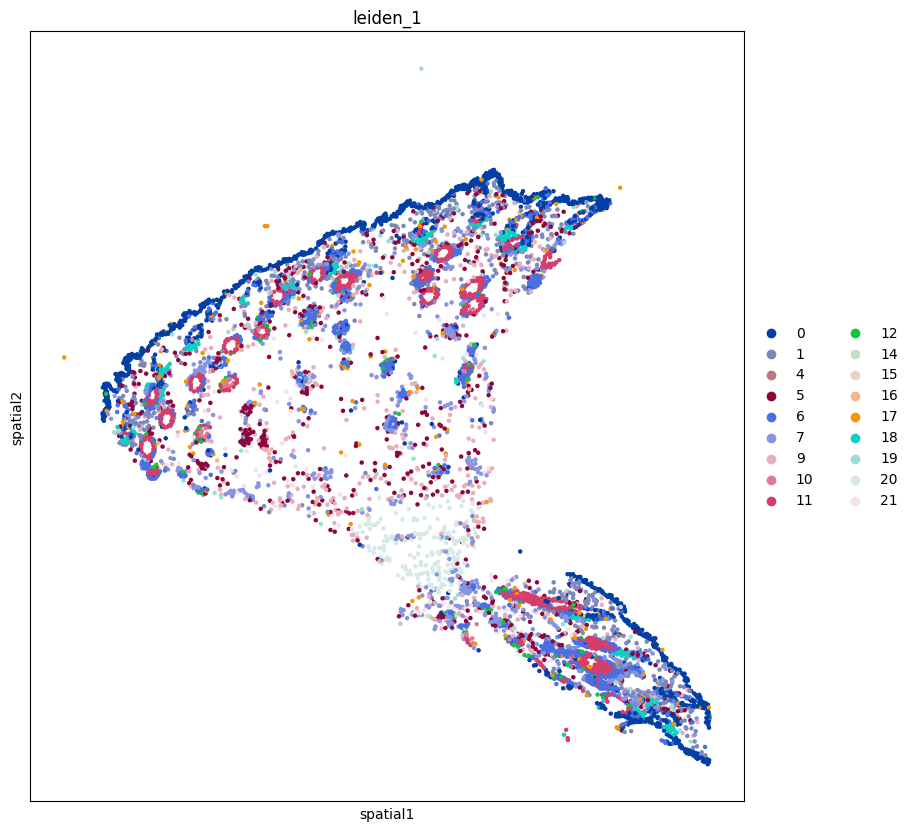

Pdl1_wt


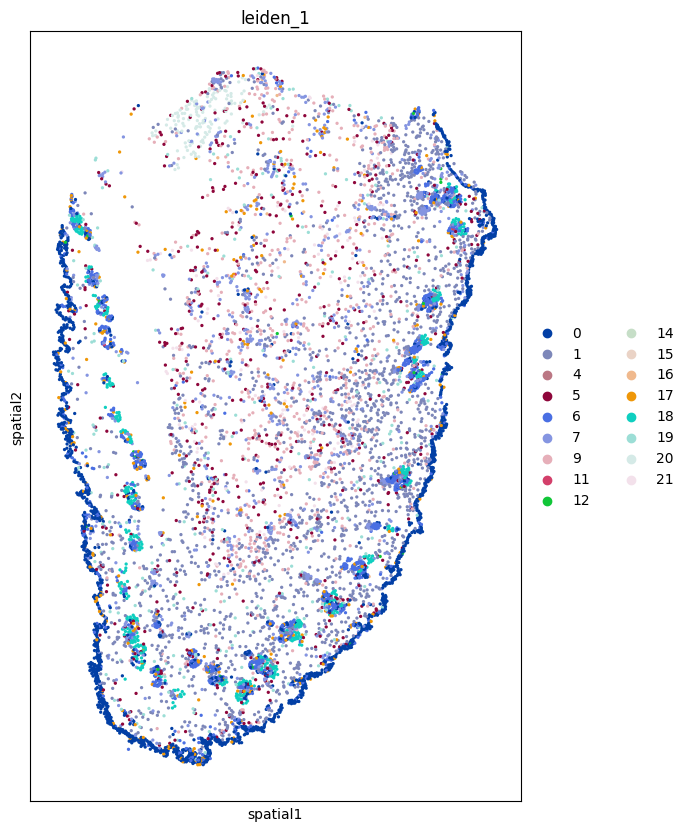

Oprl1_cre


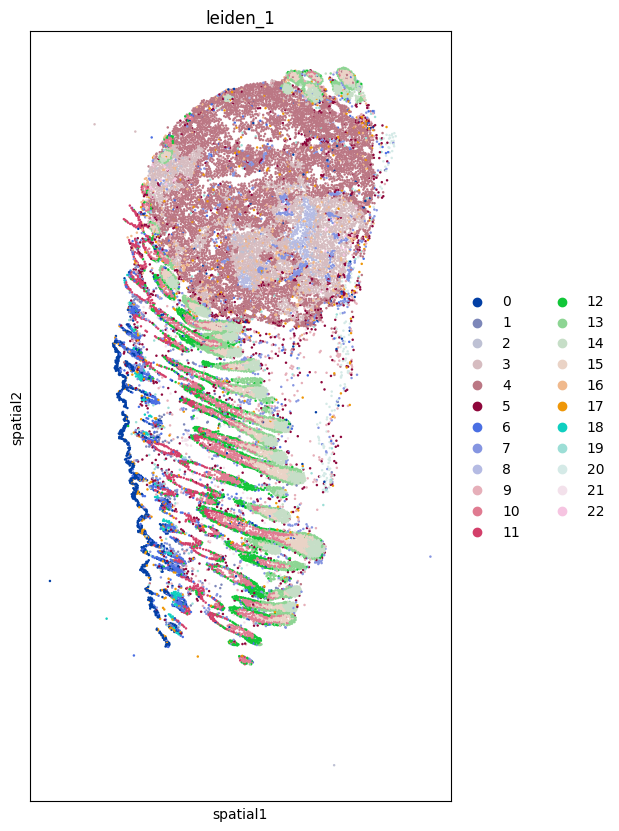

Oprl1_cre


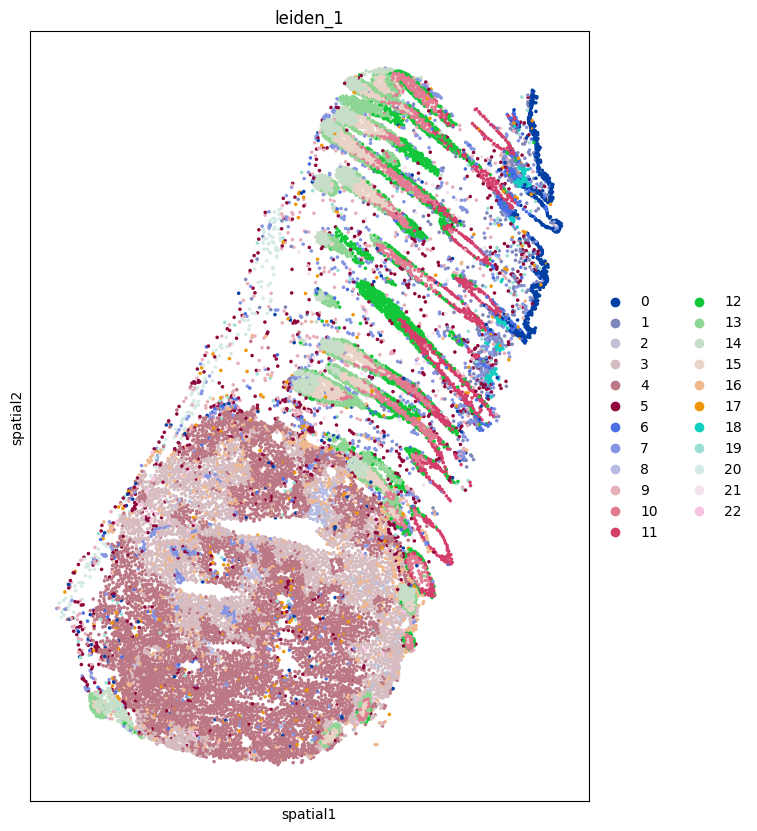

c57


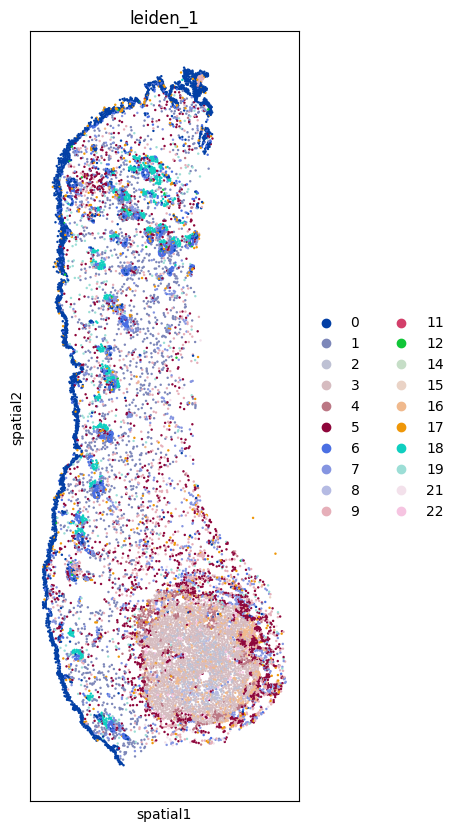

c57


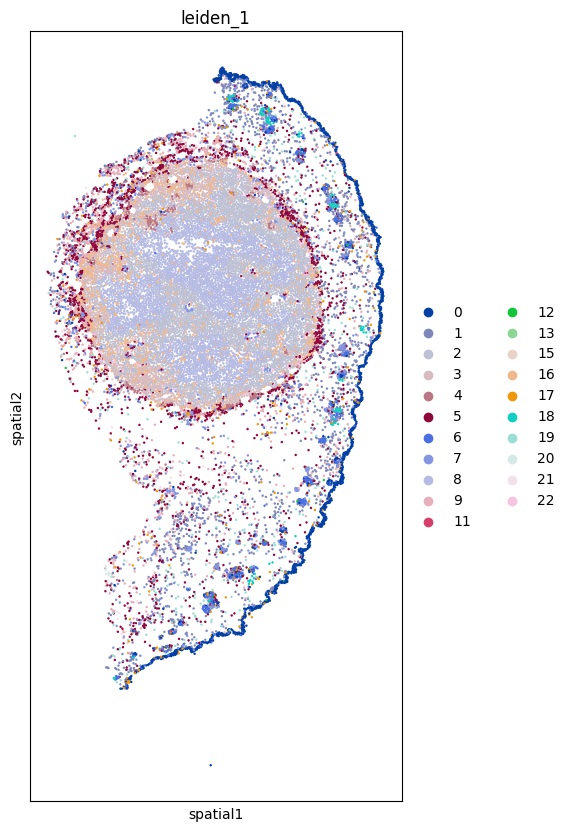

c57


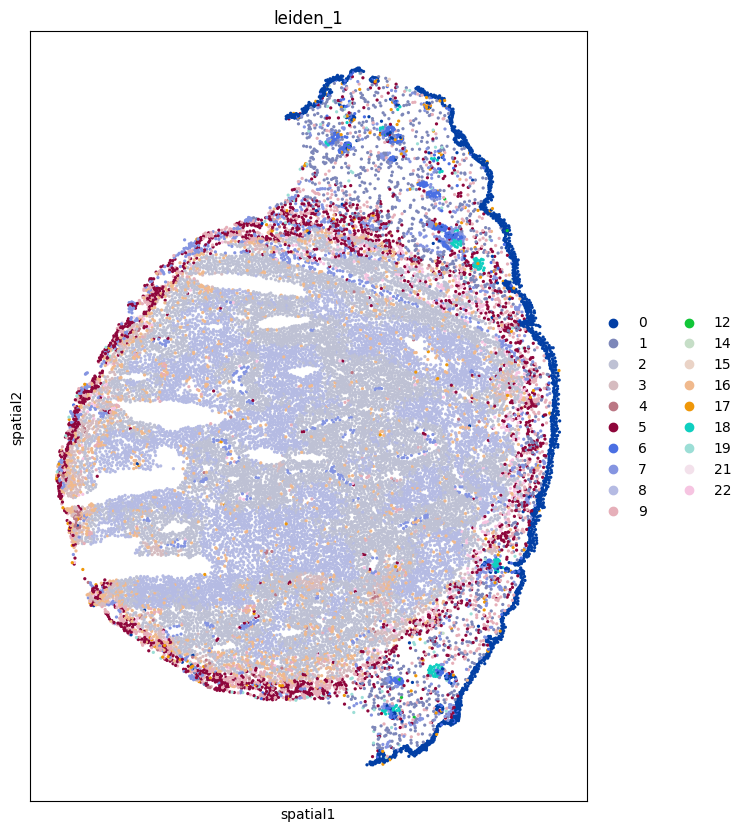

Oprl1_wt


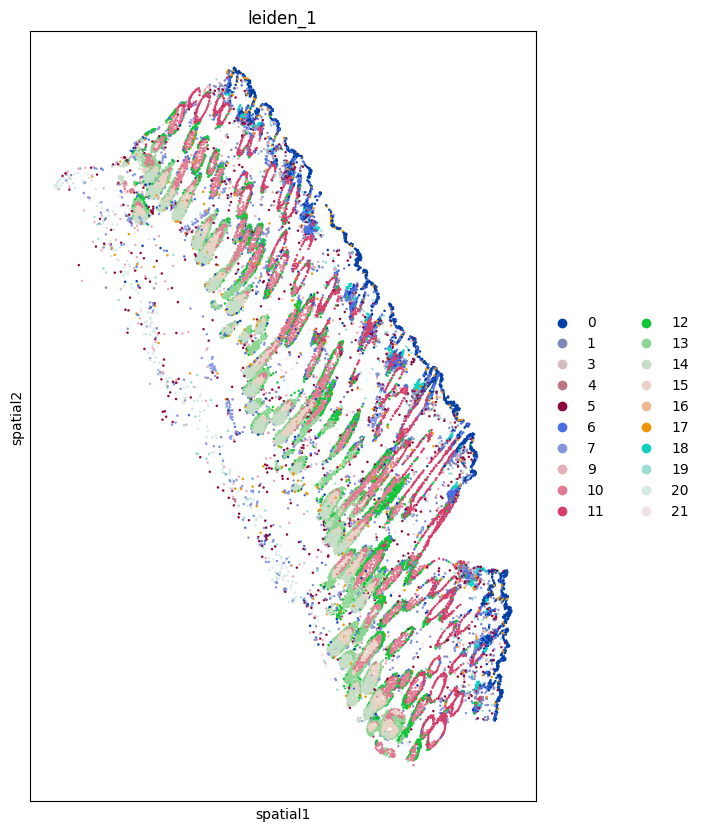

Pdl1_cre


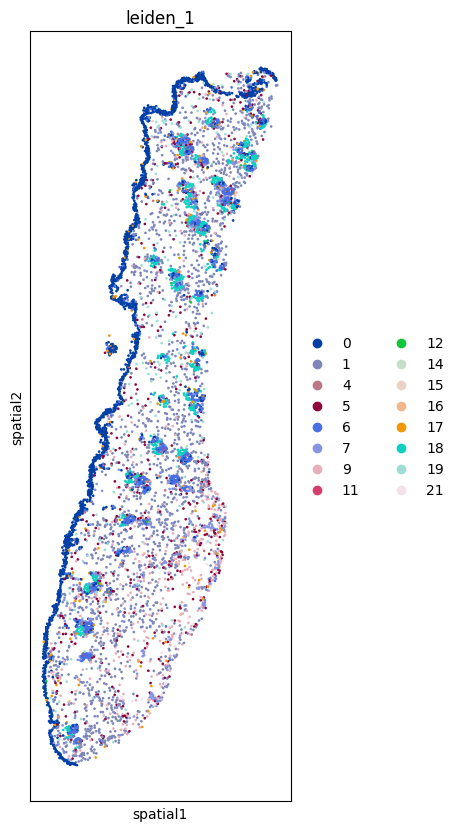

Pdl1_cre


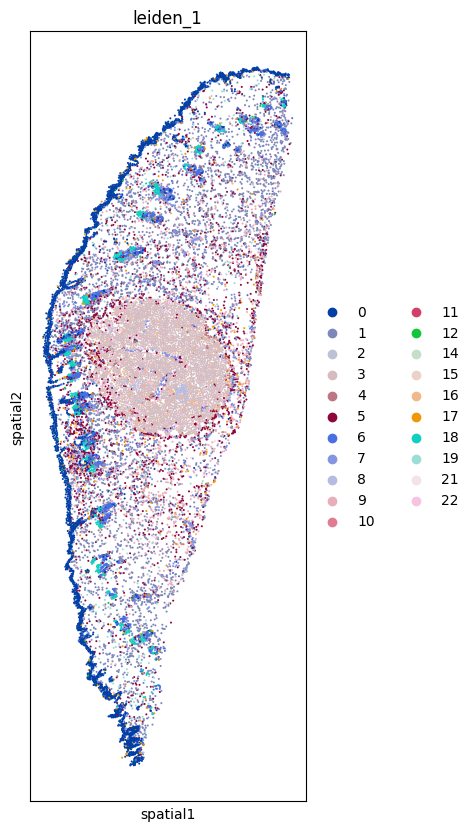

Pdl1_cre


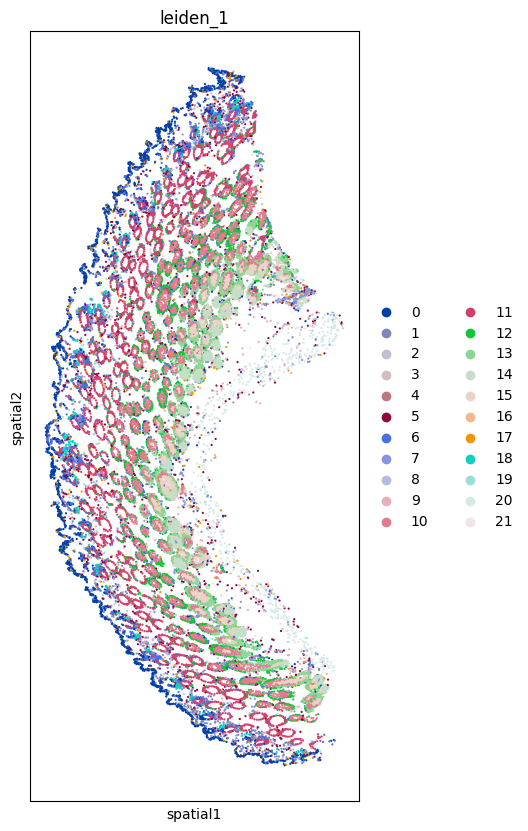

Pdl1_cre


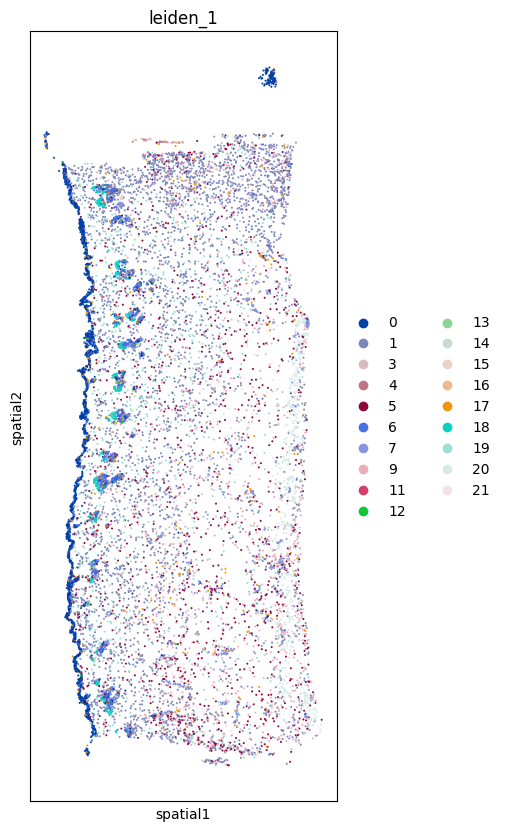

In [20]:
sample_id = []
for grid in ad.obs['sample_id'].unique():    
    ad_int = ad[ad.obs['sample_id'] == grid]
    print(ad_int.obs.condition.unique()[0])
    with plt.rc_context({'figure.figsize': (20, 10)}):
        sc.pl.spatial(ad_int, spot_size=15, color = 'leiden_1')
   
    plt.show()


In [45]:

# assume you have run clustering already
sc.tl.rank_genes_groups(ad, groupby="leiden_0.5", method="wilcoxon")

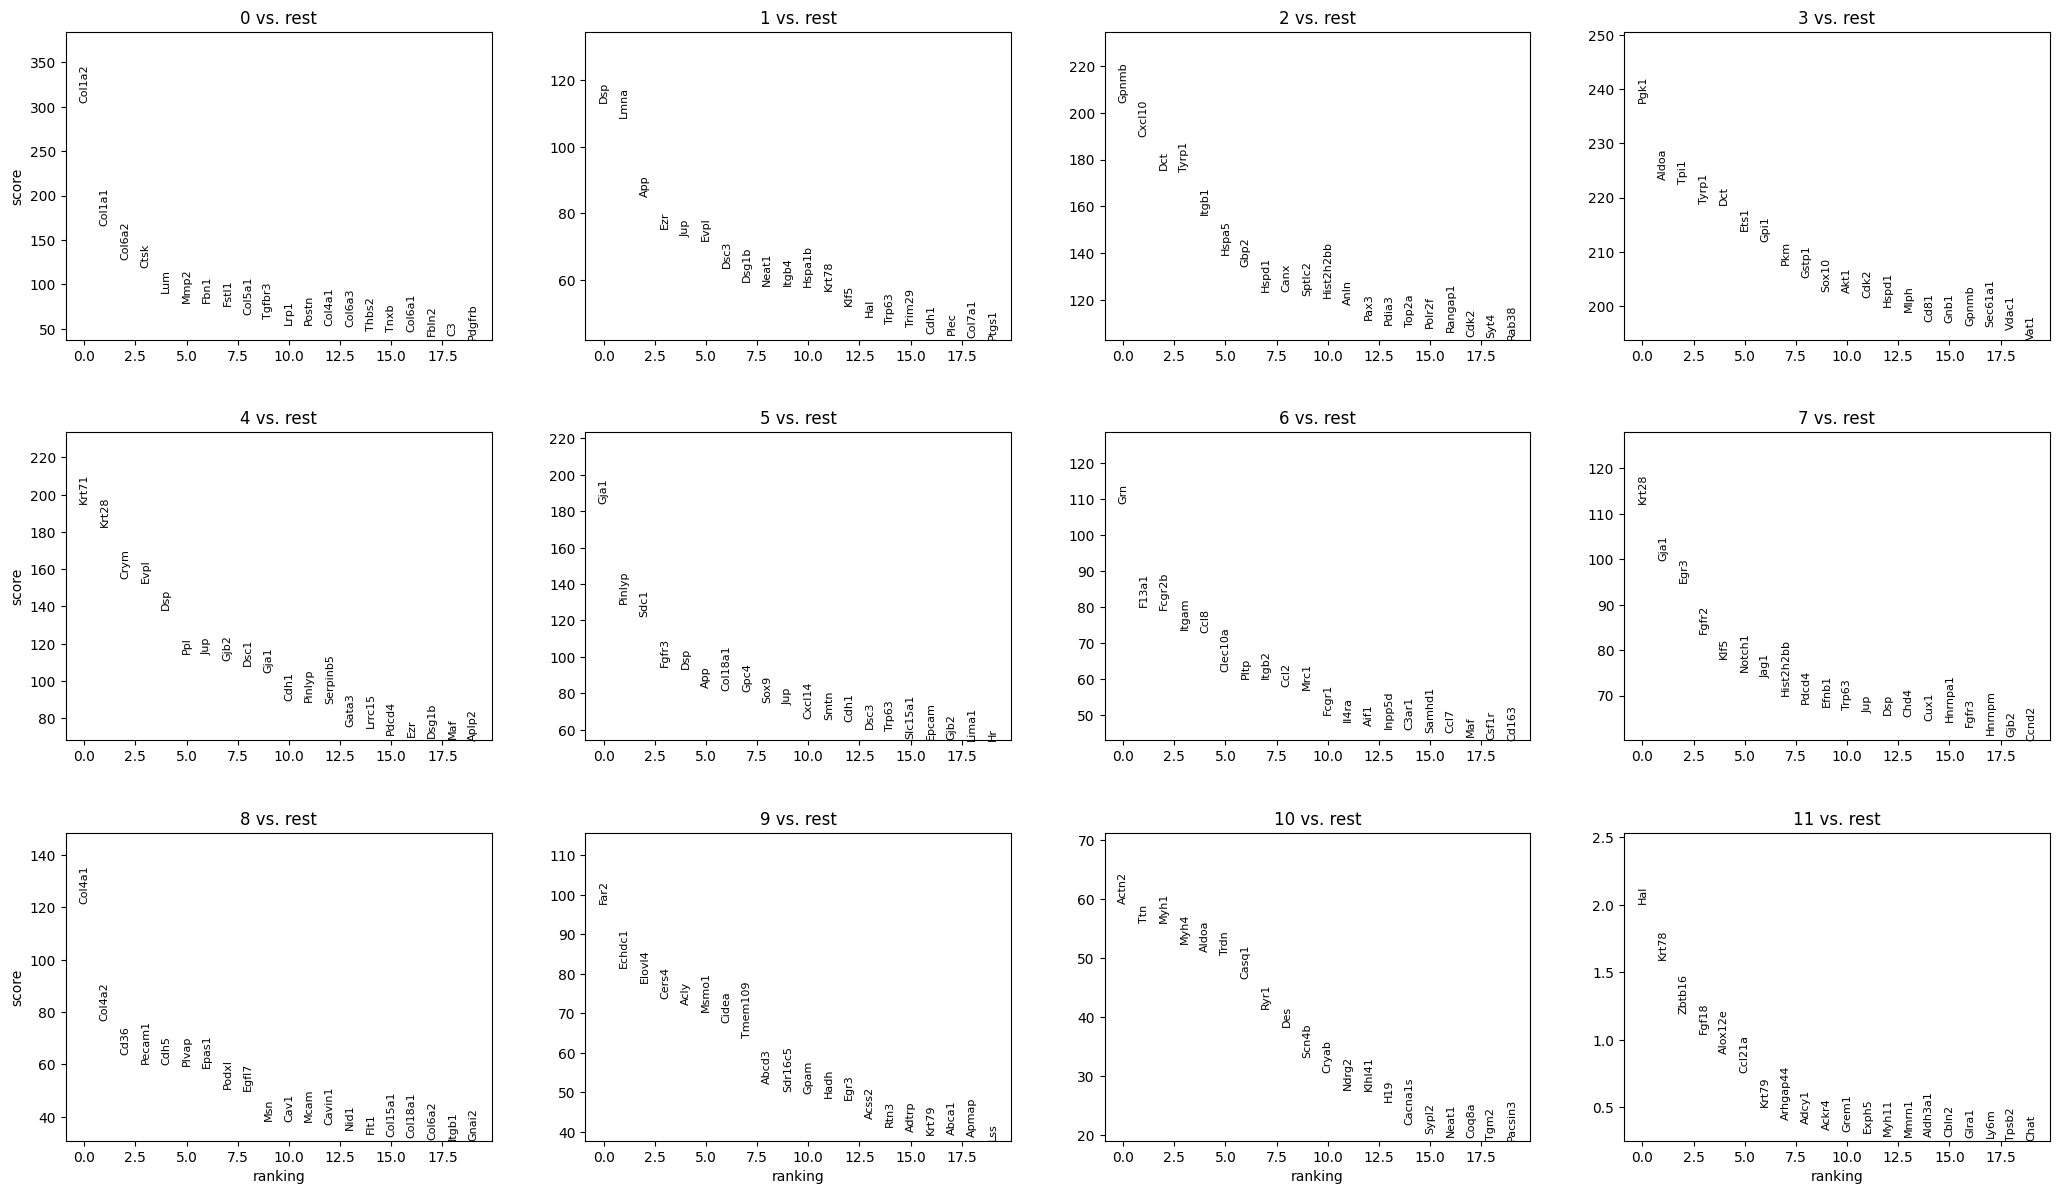

In [46]:
sc.pl.rank_genes_groups(ad, n_genes=20, sharey=False, ncols=4)

In [50]:
marker_genes = pd.DataFrame({
    group: ad.uns['rank_genes_groups']['names'][group][:20]
    for group in ad.uns['rank_genes_groups']['names'].dtype.names
})
marker_genes.head()
#marker_genes.to_csv('../data/broad_markers_leiden0-5.csv')

0     1       2      3      4       5       6      7       8       9  \
0  Col1a2   Dsp   Gpnmb   Pgk1  Krt71    Gja1     Grn  Krt28  Col4a1    Far2   
1  Col1a1  Lmna  Cxcl10  Aldoa  Krt28  Pinlyp   F13a1   Gja1  Col4a2  Echdc1   
2  Col6a2   App     Dct   Tpi1   Crym    Sdc1  Fcgr2b   Egr3    Cd36  Elovl4   
3    Ctsk   Ezr   Tyrp1  Tyrp1   Evpl   Fgfr3   Itgam  Fgfr2  Pecam1   Cers4   
4     Lum   Jup   Itgb1    Dct    Dsp     Dsp    Ccl8   Klf5    Cdh5    Acly   

      10       11  
0  Actn2      Hal  
1    Ttn    Krt78  
2   Myh1   Zbtb16  
3   Myh4    Fgf18  
4  Aldoa  Alox12e

In [51]:
marker_dict = {}
for col in marker_genes.columns: 
    print(col)
    genes = marker_genes[col].tolist()
    print(" ".join(genes))
    print(' ')
    marker_dict[col] = genes[:3]

0
Col1a2 Col1a1 Col6a2 Ctsk Lum Mmp2 Fbn1 Fstl1 Col5a1 Tgfbr3 Lrp1 Postn Col4a1 Col6a3 Thbs2 Tnxb Col6a1 Fbln2 C3 Pdgfrb
 
1
Dsp Lmna App Ezr Jup Evpl Dsc3 Dsg1b Neat1 Itgb4 Hspa1b Krt78 Klf5 Hal Trp63 Trim29 Cdh1 Plec Col7a1 Ptgs1
 
2
Gpnmb Cxcl10 Dct Tyrp1 Itgb1 Hspa5 Gbp2 Hspd1 Canx Sptlc2 Hist2h2bb Anln Pax3 Pdia3 Top2a Polr2f Rangap1 Cdk2 Syt4 Rab38
 
3
Pgk1 Aldoa Tpi1 Tyrp1 Dct Ets1 Gpi1 Pkm Gstp1 Sox10 Akt1 Cdk2 Hspd1 Mlph Cd81 Gnb1 Gpnmb Sec61a1 Vdac1 Vat1
 
4
Krt71 Krt28 Crym Evpl Dsp Ppl Jup Gjb2 Dsc1 Gja1 Cdh1 Pinlyp Serpinb5 Gata3 Lrrc15 Pdcd4 Ezr Dsg1b Maf Aplp2
 
5
Gja1 Pinlyp Sdc1 Fgfr3 Dsp App Col18a1 Gpc4 Sox9 Jup Cxcl14 Smtn Cdh1 Dsc3 Trp63 Slc15a1 Epcam Gjb2 Lima1 Hr
 
6
Grn F13a1 Fcgr2b Itgam Ccl8 Clec10a Pltp Itgb2 Ccl2 Mrc1 Fcgr1 Il4ra Aif1 Inpp5d C3ar1 Samhd1 Ccl7 Maf Csf1r Cd163
 
7
Krt28 Gja1 Egr3 Fgfr2 Klf5 Notch1 Jag1 Hist2h2bb Pdcd4 Efnb1 Trp63 Jup Dsp Chd4 Cux1 Hnrnpa1 Fgfr3 Hnrnpm Gjb2 Ccnd2
 
8
Col4a1 Col4a2 Cd36 Pecam1 Cdh5 Plvap Epas1 Podxl Egfl7 Msn Ca

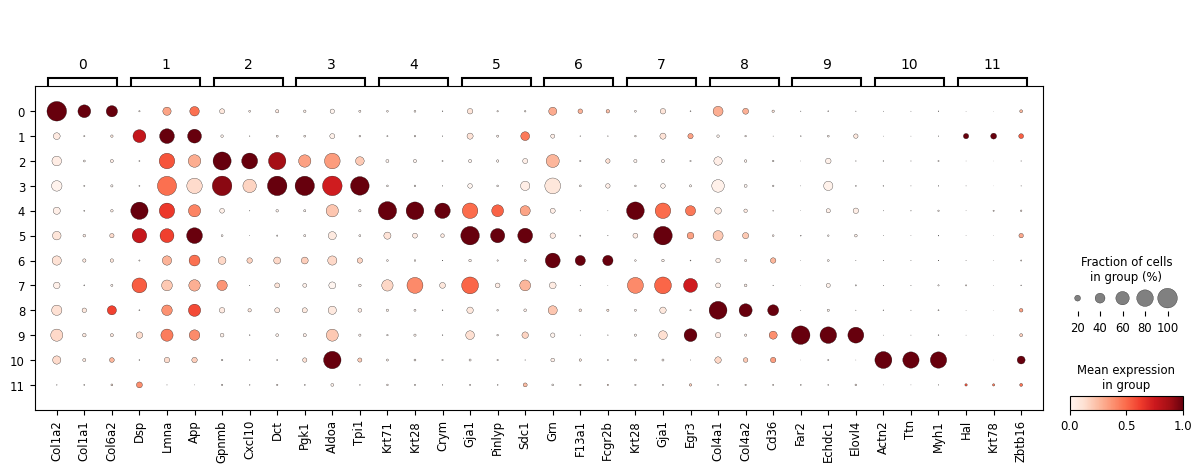

In [52]:
sc.pl.dotplot(ad, marker_dict, groupby="leiden_0.5", standard_scale="var")